## Load Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

### Load data and labels
Load data and labels from `/data` directory

In [20]:
train_path = '../data/train'
os.listdir(train_path)[:5]

['00022e1a.jpg',
 '000466c4.jpg',
 '00087b01.jpg',
 '001296d5.jpg',
 '0014cfdf.jpg']

In [5]:
train_labels_pd = pd.read_csv('{}/train.csv'.format(train_path))
train_labels_pd.head()

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3


### Build a dictionary 
Build a dictionary with filename as keys, so it is easy to retrieve labels

In [12]:
train_labels_dict = train_labels_pd.set_index('Image')['Id'].to_dict()
sample_filename = os.listdir(train_path)[0]
print(sample_filename, train_labels_dict[sample_filename])

00022e1a.jpg w_e15442c


### See sample images
Let us see some images with labels

In [36]:
def imshow(*images, cmap='jet', rows=None, labels=None):
    """
    Shows images loaded by opencv
    Can also be used to show single layer image

    Args:
        *images: one of more np.array of shape h,w,c or simple h,w
        cmap: specify a cmap to apply to all images (jet by default)
    Returns:
        None
    """
    
    plt.rcParams['image.cmap'] = cmap

    no_of_images = len(images)

    if no_of_images is 1:
        plt.imshow(images[0])
        plt.axis('off')
        return

    if rows is None:
        rows = int(np.sqrt(no_of_images))
    if rows > len(images):
        raise ValueError('Rows can be more than the number of images')
    columns = int(np.ceil(no_of_images / rows))
    
    should_show_labels = True
    if labels is None:
        should_show_labels = False
    elif len(labels) != len(images):
        raise ValueError('Should provide labels with dim same as that of images: {} != {}'.format(len(labels), len(images)))

    fig, axes = plt.subplots(rows, columns)
    for index, axis in enumerate(axes.reshape(-1)):
        if index < no_of_images:
            axis.imshow(images[index])
            if should_show_labels:
                axis.set_title(labels[index])
        axis.axis('off')

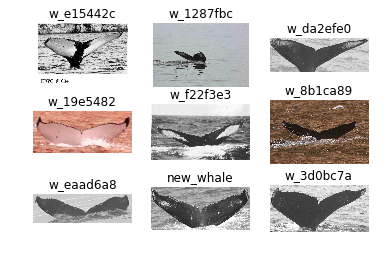

In [42]:
imfiles = []
imlabels = []
load_image_count = 9
for index, filename in enumerate(os.listdir(train_path)):
    imfile = cv2.imread('{}/{}'.format(train_path,filename))
    imfiles.append(imfile)
    imlabels.append(train_labels_dict[filename])
    if index >= load_image_count-1: break
imshow(*imfiles, labels=imlabels)

## Data Analysis
Let's analyse the data

In [49]:
from collections import Counter

In [53]:
class_counter = Counter(train_labels_dict.values())
no_classes = len(class_counter.keys())
print('Number of classes: {}'.format(no_classes))

Number of classes: 4251


In [106]:
def plot_dict(data, xlabel=None, ylabel=None):
    if isinstance(data, list):
        data = dict(data)
        
    data = dict(sorted(data.items(), key=lambda pair: pair[0]))
    plt.bar(range(len(data)), list(data.values()), align='center')
    plt.xticks(range(len(data)), list(data.keys()), rotation=90)
    
    if xlabel is not None: plt.xlabel(xlabel)
    if ylabel is not None: plt.ylabel(ylabel)
    plt.show()

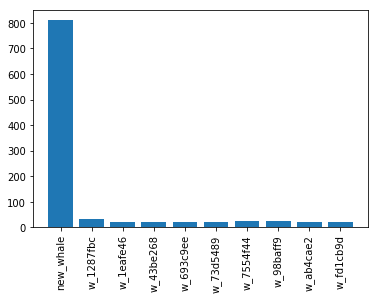

In [107]:
plot_dict(class_counter.most_common(10))

Looks like we have `new_whale` (the unclassified one) as the class containing the highest number of images, and even the runner up has less than 50 images. Maybe number of classes against image count would give a better perception

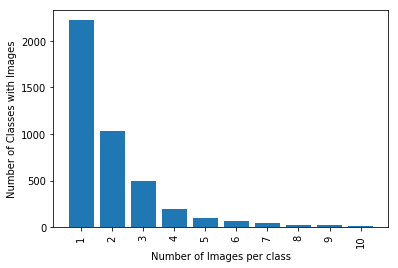

In [109]:
no_of_classes_with_no_images = Counter(class_counter.values())
plot_dict(no_of_classes_with_no_images.most_common(10),
            xlabel='Number of Images per class', ylabel='Number of Classes with Images')

Clearly from the plots, we have about 2400 classes with just 1 images, 1000 classes with 2 images, and 500 classes with 3 images and that constitute close to 4000 out of 4500 classes we have in total. This makes the classification harder.

## Preprocessing